# Experiment 6: The Anatomy of Convergence - Cross-Game Analysis

**Objective**: Analyze the *internal learning dynamics* of CFR across different game types to understand:
1. How game complexity affects convergence speed
2. Whether CFR+ improvements hold across all settings
3. Which metrics are most predictive of equilibrium quality

**New Metrics**:
1. **Average Regret**: $\frac{1}{IT} \sum_{i=1}^{I} \sum_{t=1}^{T} R_i^+(t)$ - Measures regret minimization rate
2. **Strategy Entropy**: $-\sum_a \pi(a) \log \pi(a)$ - Measures strategy randomness
3. **Strategy Stability**: $||\pi_t - \pi_{t-1}||_2$ - Measures convergence smoothness

**Games Tested**:
*   **2P Kuhn Poker**: Simple baseline
*   **3P Kuhn Poker**: Multiplayer complexity
*   **2P Leduc Poker**: State space explosion

**Hypothesis**:
*   CFR+ should show faster regret decay and lower stability (smoother convergence) across all games
*   More complex games will require more iterations for stability to decrease
*   Entropy should correlate with the nature of equilibrium (mixed vs pure strategies)

In [1]:
%matplotlib inline
import pyspiel
import numpy as np
import matplotlib.pyplot as plt
from solvers import CFRSolver, CFRPlusSolver

print("Ready to analyze convergence anatomy across multiple games!")

Optional module pokerkit_wrapper was not importable: No module named 'pokerkit'
Ready to analyze convergence anatomy across multiple games!


## Part 1: 2-Player Kuhn Poker (Baseline)

In [2]:
print("=" * 60)
print("GAME 1: 2-Player Kuhn Poker")
print("=" * 60)

game_2p_kuhn = pyspiel.load_game("kuhn_poker")
iterations = 5000
log_every = 50

print("Training Vanilla CFR...")
solver_2p_vanilla = CFRSolver(game_2p_kuhn)
history_2p_vanilla = solver_2p_vanilla.train(iterations, log_every=log_every)

print("Training CFR+...")
solver_2p_plus = CFRPlusSolver(game_2p_kuhn)
history_2p_plus = solver_2p_plus.train(iterations, log_every=log_every)

print("\n2P Kuhn Poker - Final NashConv:")
print(f"  Vanilla CFR: {history_2p_vanilla['nash_conv'][-1]:.6f}")
print(f"  CFR+: {history_2p_plus['nash_conv'][-1]:.6f}")

GAME 1: 2-Player Kuhn Poker
Training Vanilla CFR...
Iteration 500/5000 - NashConv: 0.055603
Iteration 1000/5000 - NashConv: 0.036705
Iteration 1500/5000 - NashConv: 0.039078
Iteration 2000/5000 - NashConv: 0.016074
Iteration 2500/5000 - NashConv: 0.039714
Iteration 3000/5000 - NashConv: 0.026861
Iteration 3500/5000 - NashConv: 0.028817
Iteration 4000/5000 - NashConv: 0.031523
Iteration 4500/5000 - NashConv: 0.022053
Iteration 5000/5000 - NashConv: 0.024251
Training CFR+...
Iteration 500/5000 - NashConv: 0.027310
Iteration 1000/5000 - NashConv: 0.060549
Iteration 1500/5000 - NashConv: 0.040293
Iteration 2000/5000 - NashConv: 0.030496
Iteration 2500/5000 - NashConv: 0.035744
Iteration 3000/5000 - NashConv: 0.025114
Iteration 3500/5000 - NashConv: 0.017625
Iteration 4000/5000 - NashConv: 0.018421
Iteration 4500/5000 - NashConv: 0.016920
Iteration 5000/5000 - NashConv: 0.017133

2P Kuhn Poker - Final NashConv:
  Vanilla CFR: 0.024251
  CFR+: 0.017133


## Part 2: 3-Player Kuhn Poker (Multiplayer)

In [3]:
print("=" * 60)
print("GAME 2: 3-Player Kuhn Poker")
print("=" * 60)

game_3p_kuhn = pyspiel.load_game("kuhn_poker(players=3)")
iterations = 5000
log_every = 50

print("Training Vanilla CFR...")
solver_3p_vanilla = CFRSolver(game_3p_kuhn)
history_3p_vanilla = solver_3p_vanilla.train(iterations, log_every=log_every)

print("Training CFR+...")
solver_3p_plus = CFRPlusSolver(game_3p_kuhn)
history_3p_plus = solver_3p_plus.train(iterations, log_every=log_every)

print("\n3P Kuhn Poker - Final NashConv:")
print(f"  Vanilla CFR: {history_3p_vanilla['nash_conv'][-1]:.6f}")
print(f"  CFR+: {history_3p_plus['nash_conv'][-1]:.6f}")

GAME 2: 3-Player Kuhn Poker
Training Vanilla CFR...
Iteration 500/5000 - NashConv: 0.206923
Iteration 1000/5000 - NashConv: 0.129537
Iteration 1500/5000 - NashConv: 0.131886
Iteration 2000/5000 - NashConv: 0.079863
Iteration 2500/5000 - NashConv: 0.084729
Iteration 3000/5000 - NashConv: 0.064258
Iteration 3500/5000 - NashConv: 0.082887
Iteration 4000/5000 - NashConv: 0.090615
Iteration 4500/5000 - NashConv: 0.075984
Iteration 5000/5000 - NashConv: 0.061708
Training CFR+...
Iteration 500/5000 - NashConv: 0.125771
Iteration 1000/5000 - NashConv: 0.104051
Iteration 1500/5000 - NashConv: 0.099641
Iteration 2000/5000 - NashConv: 0.088420
Iteration 2500/5000 - NashConv: 0.077012
Iteration 3000/5000 - NashConv: 0.076692
Iteration 3500/5000 - NashConv: 0.066586
Iteration 4000/5000 - NashConv: 0.066801
Iteration 4500/5000 - NashConv: 0.063895
Iteration 5000/5000 - NashConv: 0.061067

3P Kuhn Poker - Final NashConv:
  Vanilla CFR: 0.061708
  CFR+: 0.061067


## Part 3: 2-Player Leduc Poker (High Complexity)

In [4]:
print("=" * 60)
print("GAME 3: 2-Player Leduc Poker")
print("=" * 60)

game_leduc = pyspiel.load_game("leduc_poker")
iterations = 2000  # Fewer iterations due to complexity
log_every = 50

print("Training Vanilla CFR...")
solver_leduc_vanilla = CFRSolver(game_leduc)
history_leduc_vanilla = solver_leduc_vanilla.train(iterations, log_every=log_every)

print("Training CFR+...")
solver_leduc_plus = CFRPlusSolver(game_leduc)
history_leduc_plus = solver_leduc_plus.train(iterations, log_every=log_every)

print("\nLeduc Poker - Final NashConv:")
print(f"  Vanilla CFR: {history_leduc_vanilla['nash_conv'][-1]:.6f}")
print(f"  CFR+: {history_leduc_plus['nash_conv'][-1]:.6f}")

GAME 3: 2-Player Leduc Poker
Training Vanilla CFR...
Iteration 500/2000 - NashConv: 2.334086
Iteration 1000/2000 - NashConv: 1.638072
Iteration 1500/2000 - NashConv: 1.345820
Iteration 2000/2000 - NashConv: 1.125248
Training CFR+...
Iteration 500/2000 - NashConv: 2.034130
Iteration 1000/2000 - NashConv: 1.337441
Iteration 1500/2000 - NashConv: 1.050019
Iteration 2000/2000 - NashConv: 0.841110

Leduc Poker - Final NashConv:
  Vanilla CFR: 1.125248
  CFR+: 0.841110


## Visualization: NashConv Across All Games

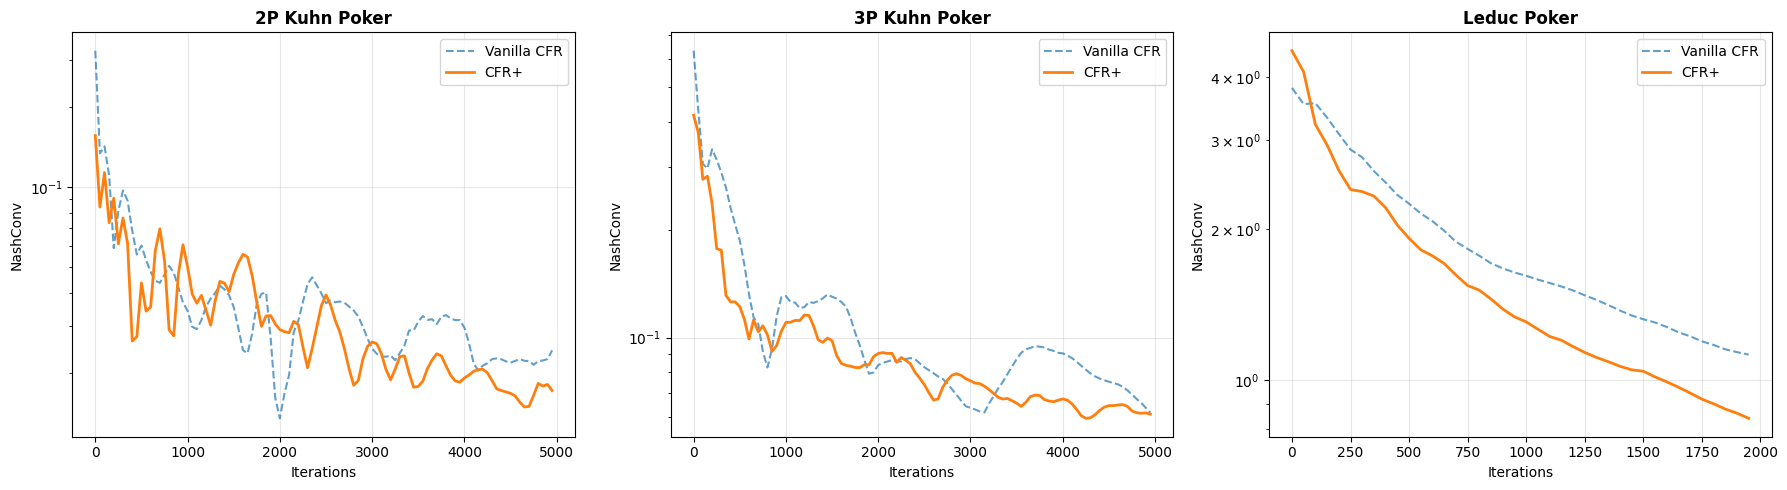

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

games_data = [
    ("2P Kuhn Poker", history_2p_vanilla, history_2p_plus, 50),
    ("3P Kuhn Poker", history_3p_vanilla, history_3p_plus, 50),
    ("Leduc Poker", history_leduc_vanilla, history_leduc_plus, 50)
]

for idx, (title, hist_v, hist_p, log_every) in enumerate(games_data):
    ax = axes[idx]
    x_axis = np.arange(len(hist_v['nash_conv'])) * log_every
    
    ax.plot(x_axis, hist_v['nash_conv'], label="Vanilla CFR", linestyle="--", alpha=0.7)
    ax.plot(x_axis, hist_p['nash_conv'], label="CFR+", linewidth=2)
    
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel("Iterations")
    ax.set_ylabel("NashConv")
    ax.set_yscale("log")
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Comparative Analysis: Average Regret Decay

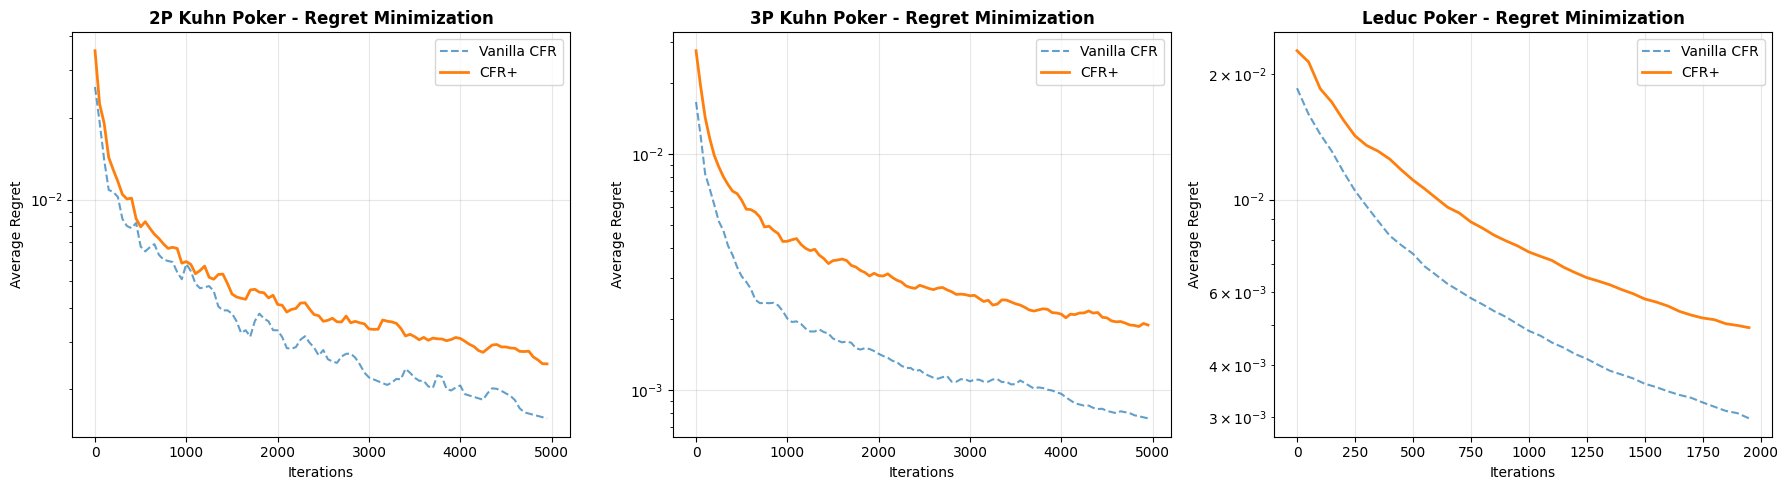

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (title, hist_v, hist_p, log_every) in enumerate(games_data):
    ax = axes[idx]
    x_axis = np.arange(len(hist_v['avg_regret'])) * log_every
    
    ax.plot(x_axis, hist_v['avg_regret'], label="Vanilla CFR", linestyle="--", alpha=0.7)
    ax.plot(x_axis, hist_p['avg_regret'], label="CFR+", linewidth=2)
    
    ax.set_title(f"{title} - Regret Minimization", fontsize=12, fontweight='bold')
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Average Regret")
    ax.set_yscale("log")
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Comparative Analysis: Strategy Stability

<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
/var/folders/_7/dnhg9j7d32z31mv539nxpcq40000gn/T/ipykernel_20635/1209331550.py:12: SyntaxWarning: invalid escape sequence '\p'
  ax.set_ylabel("L2 Distance ($||\pi_t - \pi_{t-1}||$)")


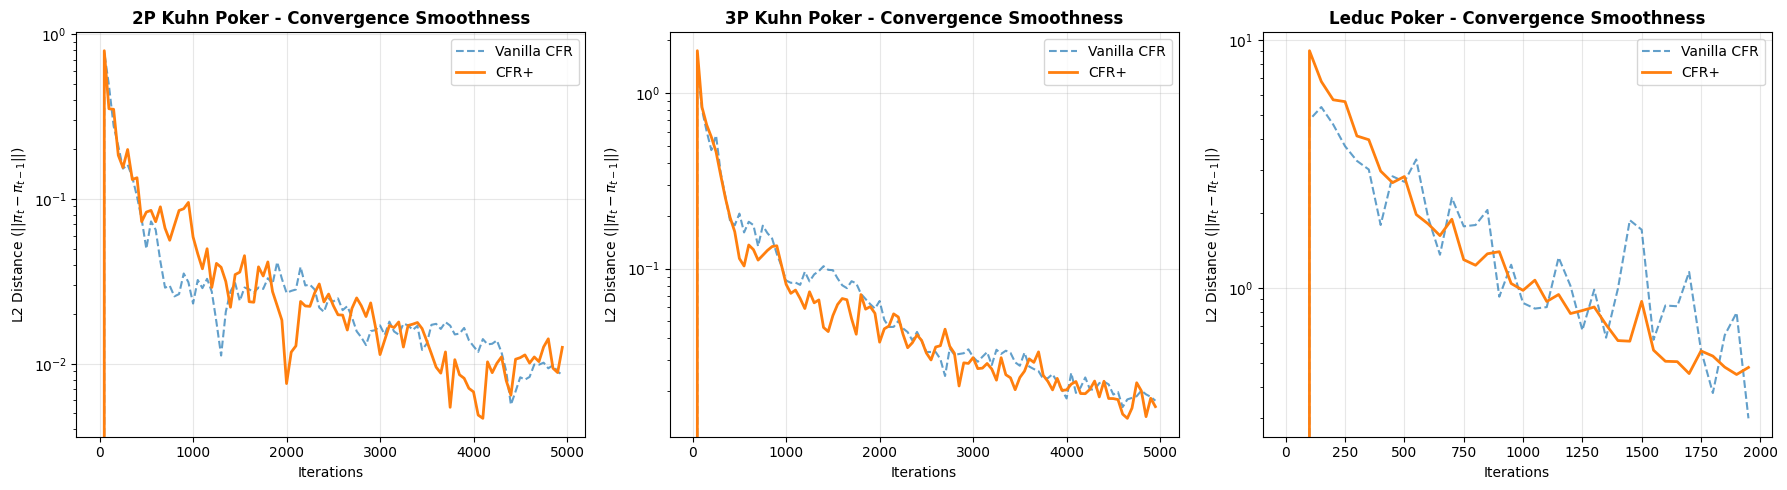

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (title, hist_v, hist_p, log_every) in enumerate(games_data):
    ax = axes[idx]
    x_axis = np.arange(len(hist_v['strategy_stability'])) * log_every
    
    ax.plot(x_axis, hist_v['strategy_stability'], label="Vanilla CFR", linestyle="--", alpha=0.7)
    ax.plot(x_axis, hist_p['strategy_stability'], label="CFR+", linewidth=2)
    
    ax.set_title(f"{title} - Convergence Smoothness", fontsize=12, fontweight='bold')
    ax.set_xlabel("Iterations")
    ax.set_ylabel("L2 Distance ($||\pi_t - \pi_{t-1}||$)")
    ax.set_yscale("log")
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Comparative Analysis: Strategy Entropy

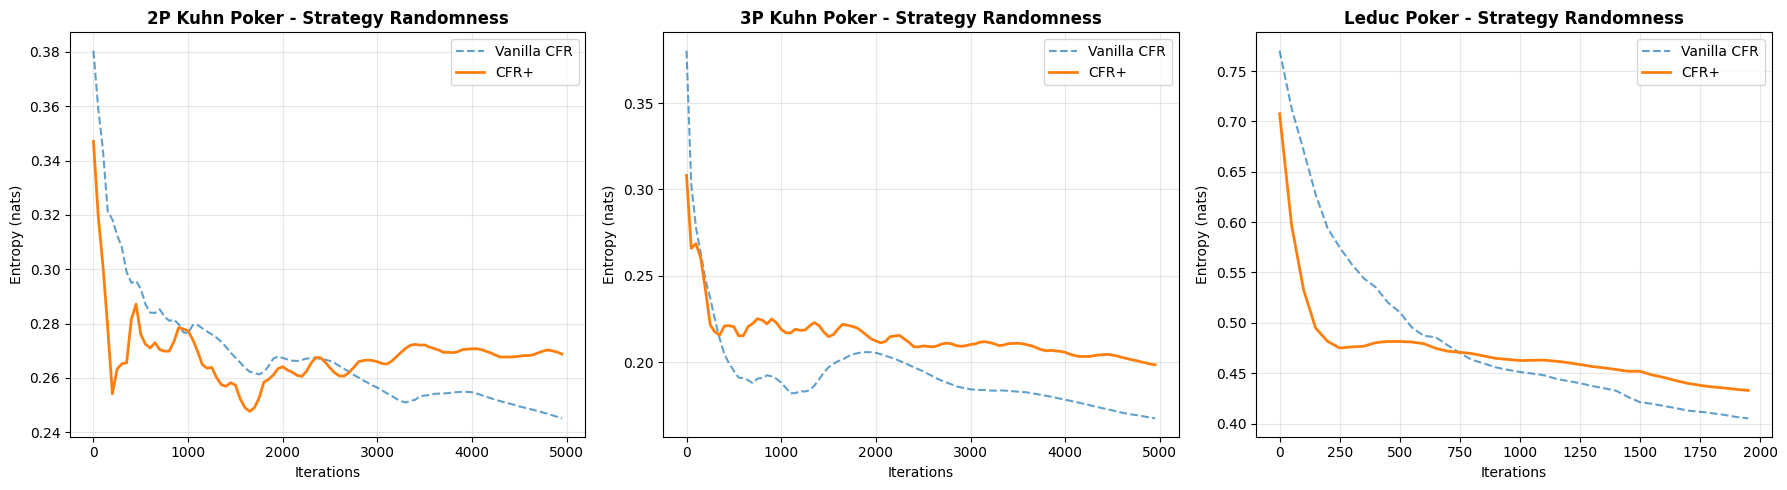

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (title, hist_v, hist_p, log_every) in enumerate(games_data):
    ax = axes[idx]
    x_axis = np.arange(len(hist_v['strategy_entropy'])) * log_every
    
    ax.plot(x_axis, hist_v['strategy_entropy'], label="Vanilla CFR", linestyle="--", alpha=0.7)
    ax.plot(x_axis, hist_p['strategy_entropy'], label="CFR+", linewidth=2)
    
    ax.set_title(f"{title} - Strategy Randomness", fontsize=12, fontweight='bold')
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Entropy (nats)")
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print("=" * 60)
print("VISUALIZATION: Average Regret")
print("=" * 60)

plt.figure(figsize=(12, 6))

# 2P Kuhn
plt.plot(history_2p_vanilla['avg_regret'], label='2P Kuhn (Vanilla)', linestyle='--', alpha=0.7)
plt.plot(history_2p_plus['avg_regret'], label='2P Kuhn (CFR+)', linewidth=2)

# 3P Kuhn
plt.plot(history_3p_vanilla['avg_regret'], label='3P Kuhn (Vanilla)', linestyle='--', alpha=0.7)
plt.plot(history_3p_plus['avg_regret'], label='3P Kuhn (CFR+)', linewidth=2)

# Leduc
plt.plot(history_leduc_vanilla['avg_regret'], label='Leduc (Vanilla)', linestyle='--', alpha=0.7)
plt.plot(history_leduc_plus['avg_regret'], label='Leduc (CFR+)', linewidth=2)

plt.yscale('log')
plt.xlabel('Iterations (x50)')
plt.ylabel('Average Regret (Log Scale)')
plt.title('Regret Minimization: Vanilla CFR vs CFR+')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
print("=" * 60)
print("VISUALIZATION: Strategy Entropy")
print("=" * 60)

plt.figure(figsize=(12, 6))

# 2P Kuhn
plt.plot(history_2p_vanilla['strategy_entropy'], label='2P Kuhn (Vanilla)', linestyle='--', alpha=0.7)
plt.plot(history_2p_plus['strategy_entropy'], label='2P Kuhn (CFR+)', linewidth=2)

# 3P Kuhn
plt.plot(history_3p_vanilla['strategy_entropy'], label='3P Kuhn (Vanilla)', linestyle='--', alpha=0.7)
plt.plot(history_3p_plus['strategy_entropy'], label='3P Kuhn (CFR+)', linewidth=2)

# Leduc
plt.plot(history_leduc_vanilla['strategy_entropy'], label='Leduc (Vanilla)', linestyle='--', alpha=0.7)
plt.plot(history_leduc_plus['strategy_entropy'], label='Leduc (CFR+)', linewidth=2)

plt.xlabel('Iterations (x50)')
plt.ylabel('Entropy (Randomness)')
plt.title('Strategy Entropy Evolution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
print("=" * 60)
print("VISUALIZATION: Strategy Stability")
print("=" * 60)

plt.figure(figsize=(12, 6))

# 2P Kuhn
plt.plot(history_2p_vanilla['strategy_stability'], label='2P Kuhn (Vanilla)', linestyle='--', alpha=0.7)
plt.plot(history_2p_plus['strategy_stability'], label='2P Kuhn (CFR+)', linewidth=2)

# 3P Kuhn
plt.plot(history_3p_vanilla['strategy_stability'], label='3P Kuhn (Vanilla)', linestyle='--', alpha=0.7)
plt.plot(history_3p_plus['strategy_stability'], label='3P Kuhn (CFR+)', linewidth=2)

# Leduc
plt.plot(history_leduc_vanilla['strategy_stability'], label='Leduc (Vanilla)', linestyle='--', alpha=0.7)
plt.plot(history_leduc_plus['strategy_stability'], label='Leduc (CFR+)', linewidth=2)

plt.yscale('log')
plt.xlabel('Iterations (x50)')
plt.ylabel('L2 Distance ($||\pi_t - \pi_{t-1}||$)')
plt.title('Strategy Stability (Convergence Smoothness)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()